In [151]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from vadere_analysis_tool import ScenarioOutput, VadereProject
sns.set(style="darkgrid")

def plotDensityTime(vproject, ending, axes):
    dataFrames = []
    for outStr in project.output_dirs :
        out = project.output_dirs[outStr]
        for fileStr in out.files :
            if fileStr.endswith(ending) :
                ndf = pd.DataFrame();
                df = out.files[fileStr]()
                #df = df[df.velocity > 0]
                ndf['density'] = df.density.astype(float)
                ndf['timeStep'] = df.timeStep.astype(int)
                ndf['scenario'] = [out.scenario['name']] * len(df.velocity)
                dataFrames.append(ndf)
    concatFrames = pd.concat(dataFrames)
    return sns.lineplot(x="timeStep", y="density", data=concatFrames, ax=axes)
    #plt.show()
    
def plotFundamentalDiagram(vproject, ending):
    dataFrames = []
    for outStr in project.output_dirs :
        out = project.output_dirs[outStr]
        for fileStr in out.files :
            if fileStr.endswith(ending) :
                ndf = pd.DataFrame();
                df = out.files[fileStr]()
                df = df[df.velocity > 0]
                ndf['density'] = df.density.astype(float)
                ndf['velocity'] = df.velocity.astype(float)
                ndf['scenario'] = [out.scenario['name']] * len(df.velocity)
                dataFrames.append(ndf)
    concatFrames = pd.concat(dataFrames)
    sns.relplot(x="density", y="velocity", hue="scenario", data=concatFrames)

# Load the Vadere project

In [153]:
projectFolder = "./../../../../VadereModelTests/TestOSM_zhang-2011/"
project = VadereProject(projectFolder)
#out = project.named_output.C_050_180_180_2018_11_26_16_30_29_355() 

loaded 1 out of 1 output directories. 


## Method A Plots

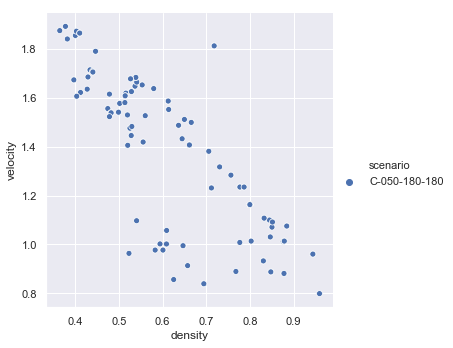

In [154]:
# transform data frame
plotFundamentalDiagram(project, "aTimeStep.fundamentalDiagram")

## Method B Plots

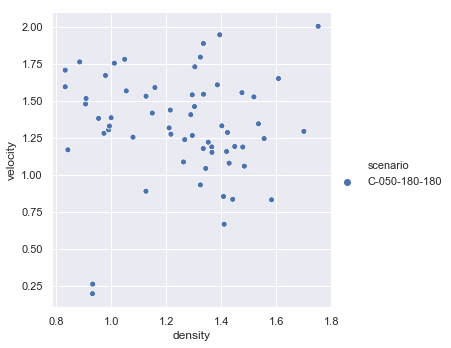

In [155]:
plotFundamentalDiagram(project, "bPedestrian.fundamentalDiagram")

## Method C Plots (classical density)

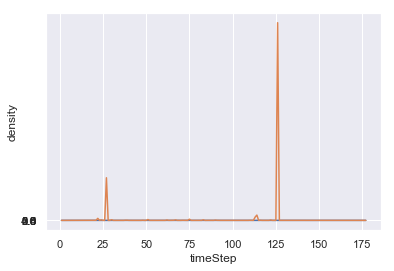

In [156]:
axes=plt.axes()
axes.set_yticks([0.4,0.8,2.5,3,4,5])
#axes.set_xticks(np.linspace(0, 199, num=5).tolist())
plotDensityTime(project, "cTimeStep.fundamentalDiagram", axes)
plotDensityTime(project, "dTimeStep.fundamentalDiagram", axes)
#axes.set_yticks([0.4,1.4,2.5,3,4,5])
#axes.set_xticks(np.linspace(0, 200, num=201).tolist())

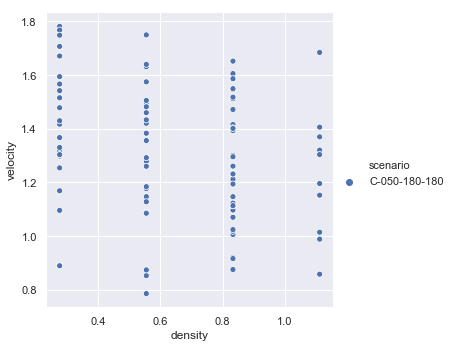

In [157]:
plotFundamentalDiagram(project, "cTimeStep.fundamentalDiagram")

## Method D Plots (voronoi density)

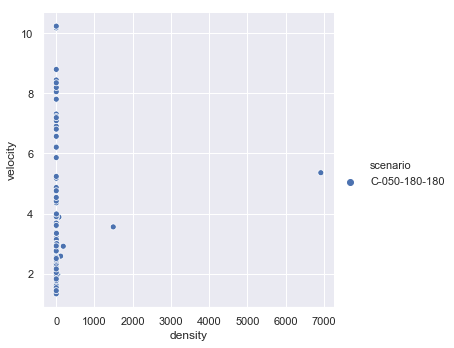

In [158]:
plotFundamentalDiagram(project, "dTimeStep.fundamentalDiagram")

In [128]:
np.linspace(0, 200, num=201).tolist()

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 111.0,
 112.0,
 113.0,
 114.0,
 115.0,
 116.0,
 117.0,
 118.0,
 119.0,
 120.0,
 121.0,
 122.0,
 123.0,
 124.0,
 125.0,
 126.0,
 127.0,
 128.0,
 129.0,
 130.0,
 131.0,
 132.0,
 133.0,
 134.0,
 135.0,
 136.0,
 137.0,
 138.0

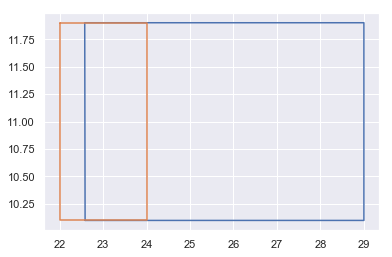

In [149]:
import matplotlib.pyplot as plt

coord1 = [[22.587603203249614,10.1], [22.587603203249614,10.1], [22.579258151260344,11.9], [22.579258151260344,11.9], [24.0,11.9], [29.0,11.9], [29.0,10.1], [24.0,10.1]]
coord2 = [[22.0,11.9], [22.579258151260344,11.9], [24.0,11.9], [24.0,11.9], [24.0,10.1], [24.0,10.1], [22.587603203249614,10.1], [22.0,10.1]]
coord1.append(coord1[0]) #repeat the first point to create a 'closed loop'
coord2.append(coord2[0])
xs1, ys1 = zip(*coord1) #create lists of x and y values
xs2, ys2 = zip(*coord2) 
plt.figure()
plt.plot(xs1,ys1)
plt.plot(xs2,ys2)
plt.show() # if you need...


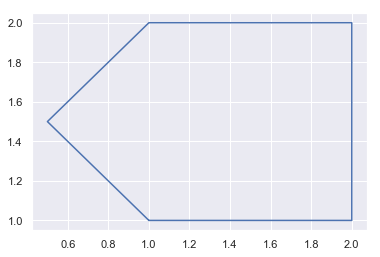

In [145]:
import matplotlib.pyplot as plt

coord = [[1,1], [2,1], [2,2], [1,2], [0.5,1.5]]
coord.append(coord[0]) #repeat the first point to create a 'closed loop'

xs, ys = zip(*coord) #create lists of x and y values

plt.figure()
plt.plot(xs,ys) 
plt.show() # if you need..